In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *
from utilsPCA import *
from plotting import *
from efficiency import *

import matplotlib as mpl

mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
mpl.rc('axes', labelsize=16, titlesize=20)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [2]:
C = 29.9792458 #cm/ns

In [3]:
#filename = 'root_files/histo_SinglePi_3LC.root'
filename = 'root_files/histo_singlePion_25863bf.root'
file = uproot.open(filename)

In [4]:
file.keys()

['ticlDumper;1',
 'ticlDumper/tracksters;1',
 'ticlDumper/clusters;1',
 'ticlDumper/graph;1',
 'ticlDumper/candidates;1',
 'ticlDumper/trackstersMerged;1',
 'ticlDumper/associations;1',
 'ticlDumper/simtrackstersSC;1',
 'ticlDumper/simtrackstersCP;1',
 'ticlDumper/tracks;1',
 'ticlDumper/simTICLCandidate;1']

In [5]:
simtrackstersSC = file["ticlDumper/simtrackstersSC"]
simtrackstersCP = file["ticlDumper/simtrackstersCP"]
tracksters  = file["ticlDumper/tracksters"]
trackstersMerged = file["ticlDumper/trackstersMerged"]
associations = file["ticlDumper/associations"]
tracks = file["ticlDumper/tracks"]
simTICLCandidate = file["ticlDumper/simTICLCandidate"]
TICLCandidate = file["ticlDumper/candidates"]
clusters = file["ticlDumper/clusters"]

In [6]:
tracks.keys()

['track_ev',
 'track_id',
 'track_pt',
 'track_charge',
 'track_time',
 'track_time_quality',
 'track_time_err',
 'track_nhits']

In [7]:
track_pt = tracks["track_pt"].array()

In [8]:
track_id = tracks["track_id"].array()
track_boundaryX = simtrackstersSC["track_boundaryX"].array()
track_boundaryY = simtrackstersSC["track_boundaryY"].array()
track_boundaryZ = simtrackstersSC["track_boundaryZ"].array()

In [9]:
cluster_number_of_hits = clusters["cluster_number_of_hits"].array()
cluster_layer_id = clusters["cluster_layer_id"].array()
cluster_type = clusters["cluster_type"].array()

In [10]:
tracksters_in_candidate = TICLCandidate["tracksters_in_candidate"].array()
track_in_candidate      = TICLCandidate["track_in_candidate"].array()

In [26]:
recoToSim_en    = associations["Mergetstracksters_recoToSim_SC_sharedE"].array()
recoToSim_score = associations["Mergetstracksters_recoToSim_SC_score"].array()
recoToSim_index = associations["Mergetstracksters_recoToSim_SC"].array()

simToReco_en    = associations["Mergetstracksters_simToReco_SC_sharedE"].array()
simToReco_score = associations["Mergetstracksters_simToReco_SC_score"].array()
simToReco_index = associations["Mergetstracksters_simToReco_SC"].array()

In [12]:
tracksters_vx        = tracksters["vertices_x"].array()
tracksters_vy        = tracksters["vertices_y"].array()
tracksters_vz        = tracksters["vertices_z"].array()
tracksters_ve        = tracksters["vertices_energy"].array()
tracksters_vi        = tracksters["vertices_indexes"].array()
tracksters_vt        = tracksters["vertices_time"].array()
tracksters_vtErr     = tracksters["vertices_timeErr"].array()
tracksters_vm        = tracksters["vertices_multiplicity"].array()
tracksters_bx        = tracksters["barycenter_x"].array()
tracksters_by        = tracksters["barycenter_y"].array()
tracksters_bz        = tracksters["barycenter_z"].array()
tracksters_be        = tracksters["raw_energy"].array()
tracksters_CALO_time = tracksters["time"].array()
tracksters_CALO_err  = tracksters["timeError"].array()
tracksters_EVx       = tracksters["eVector0_x"].array()
tracksters_EVy       = tracksters["eVector0_y"].array()
tracksters_EVz       = tracksters["eVector0_z"].array()

In [13]:
trackstersMerged_vx          = trackstersMerged["vertices_x"].array()
trackstersMerged_vy          = trackstersMerged["vertices_y"].array()
trackstersMerged_vz          = trackstersMerged["vertices_z"].array()
trackstersMerged_ve          = trackstersMerged["vertices_energy"].array()
trackstersMerged_vi          = trackstersMerged["vertices_indexes"].array()
trackstersMerged_vt          = trackstersMerged["vertices_time"].array()
trackstersMerged_vtErr       = trackstersMerged["vertices_timeErr"].array()
trackstersMerged_vm          = trackstersMerged["vertices_multiplicity"].array()
trackstersMerged_bx          = trackstersMerged["barycenter_x"].array()
trackstersMerged_by          = trackstersMerged["barycenter_y"].array()
trackstersMerged_bz          = trackstersMerged["barycenter_z"].array()
trackstersMerged_be          = trackstersMerged["raw_energy"].array()
trackstersMerged_CALO_time   = trackstersMerged["time"].array()
trackstersMerged_CALO_err    = trackstersMerged["timeError"].array()
trackstersMerged_EVx         = trackstersMerged["eVector0_x"].array()
trackstersMerged_EVy         = trackstersMerged["eVector0_y"].array()
trackstersMerged_EVz         = trackstersMerged["eVector0_z"].array()
# trackstersMerged_MTD_time    = trackstersMerged["tMtd"].array()
# trackstersMerged_MTD_err     = trackstersMerged["tMtdError"].array()
# trackstersMerged_MTD_speed   = trackstersMerged["speedMtd"].array()
# trackstersMerged_MTD_posX    = trackstersMerged["tMtdPos/tMtdPos.theVector.theX"].array()
# trackstersMerged_MTD_posY    = trackstersMerged["tMtdPos/tMtdPos.theVector.theY"].array()
# trackstersMerged_MTD_posZ    = trackstersMerged["tMtdPos/tMtdPos.theVector.theZ"].array()

In [14]:
SC_boundx        = simtrackstersSC["boundaryX"].array()
SC_boundy        = simtrackstersSC["boundaryY"].array()
SC_boundz        = simtrackstersSC["boundaryZ"].array()
SC_vx            = simtrackstersSC["vertices_x"].array()
SC_vy            = simtrackstersSC["vertices_y"].array()
SC_vz            = simtrackstersSC["vertices_z"].array()
SC_ve            = simtrackstersSC["vertices_energy"].array()
SC_vi            = simtrackstersSC["vertices_indexes"].array()
SC_vt            = simtrackstersSC["vertices_time"].array()
SC_vtErr         = simtrackstersSC["vertices_timeErr"].array()
SC_vm            = simtrackstersSC["vertices_multiplicity"].array()
SC_bx            = simtrackstersSC["barycenter_x"].array()
SC_by            = simtrackstersSC["barycenter_y"].array()
SC_bz            = simtrackstersSC["barycenter_z"].array()
SC_be            = simtrackstersSC["raw_energy"].array()
SC_CALO_time     = simtrackstersSC["time"].array()
SC_CALO_err      = simtrackstersSC["timeError"].array()
# SC_MTD_time      = simtrackstersSC["tMtd"].array()
# SC_MTD_err       = simtrackstersSC["tMtdError"].array()
# SC_MTD_simTime   = simtrackstersSC["tMtdSim"].array()
# SC_MTD_speed     = simtrackstersSC["speedMtd"].array()
# SC_MTD_simPosX   = simtrackstersSC["tMtdPos/tMtdPos.theVector.theX"].array()
# SC_MTD_simPosY   = simtrackstersSC["tMtdPos/tMtdPos.theVector.theY"].array()
# SC_MTD_simPosZ   = simtrackstersSC["tMtdPos/tMtdPos.theVector.theZ"].array()
SC_trackIdx      = simtrackstersSC["trackIdx"].array()

In [40]:
CP_boundx        = simtrackstersCP["boundaryX"].array()
CP_boundy        = simtrackstersCP["boundaryY"].array()
CP_boundz        = simtrackstersCP["boundaryZ"].array()
CP_vx            = simtrackstersCP["vertices_x"].array()
CP_vy            = simtrackstersCP["vertices_y"].array()
CP_vz            = simtrackstersCP["vertices_z"].array()
CP_ve            = simtrackstersCP["vertices_energy"].array()
CP_vi            = simtrackstersCP["vertices_indexes"].array()
CP_vt            = simtrackstersCP["vertices_time"].array()
CP_vtErr         = simtrackstersCP["vertices_timeErr"].array()
CP_vm            = simtrackstersCP["vertices_multiplicity"].array()
CP_bx            = simtrackstersCP["barycenter_x"].array()
CP_by            = simtrackstersCP["barycenter_y"].array()
CP_bz            = simtrackstersCP["barycenter_z"].array()
CP_be            = simtrackstersCP["raw_energy"].array()
CP_CALO_time     = simtrackstersCP["time"].array()
CP_CALO_err      = simtrackstersCP["timeError"].array()
# CP_MTD_time      = simtrackstersCP["tMtd"].array()
# CP_MTD_err       = simtrackstersCP["tMtdError"].array()
# CP_MTD_simTime   = simtrackstersCP["tMtdSim"].array()
# CP_MTD_speed     = simtrackstersCP["speedMtd"].array()
# CP_MTD_simPosX   = simtrackstersCP["tMtdPos/tMtdPos.theVector.theX"].array()
# CP_MTD_simPosY   = simtrackstersCP["tMtdPos/tMtdPos.theVector.theY"].array()
# CP_MTD_simPosZ   = simtrackstersCP["tMtdPos/tMtdPos.theVector.theZ"].array()
CP_trackIdx      = simtrackstersCP["trackIdx"].array()

In [15]:
print(f'There are {len(SC_vx)} events in the file')

There are 1000 events in the file


In [ ]:
#events without mtd
no_mtd = 0
for i, mtd_times in enumerate(trackstersMerged_MTD_time):
    #print(mtd_times)
    t = mtd_times[mtd_times>0]
    if len(t) == 0:
        no_mtd += 1
print(no_mtd)

## visualization 

In [17]:
color = ["red", "midnightblue", "yellow", "forestgreen", "dodgerblue", "limegreen", "orange", "grey", "purple", "lightblue", "magenta", "cyan", "sienna", "lawngreen"]*10

In [23]:
# point is a list [x,y,z]

def prop_to_bar(point, z_bar):
    # Define a line by its direction vector and a point on it
    line_dir = point # direction vector of the line
    line_pt = [0, 0, 0] # a point on the line

    # Define a plane by its normal vector and a point on it
    plane_norm = [0,0,1] # normal vector of the plane
    plane_pt = [0,0,z_bar] # a point on the plane

    # Compute the dot product of the line direction and the plane normal
    dot_prod = sum([a*b for a,b in zip(line_dir, plane_norm)])

    # Check if the dot product is zero, which means the line is parallel to the plane
    if dot_prod == 0:
        print("The line is parallel to the plane. No intersection point.")
        return [0,0,0]
    else:
        # Compute the parameter t that gives the intersection point
        t = sum([(a-b)*c for a,b,c in zip(plane_pt, line_pt, plane_norm)]) / dot_prod

        # Compute the intersection point by plugging t into the line equation
        inter_pt = [a + b*t for a,b in zip(line_pt, line_dir)]

        return inter_pt

In [58]:
%matplotlib widget
eid = 16
tid = 1
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')
#ax1.view_init(10, -45)

ax1.set_xlabel("x (cm)")
ax1.set_zlabel("y (cm)")
ax1.set_ylabel("z (cm)")

ax1.set_xlim(-10, ak.max(SC_vx[eid][tid])) #ak.min(SC_vx[eid][tid])
ax1.set_zlim(ak.min(SC_vy[eid][tid]), ak.max(SC_vy[eid][tid]))
ax1.set_ylim(ak.min(SC_vz[eid][tid]), ak.max(SC_vz[eid][tid]))

x_points = []
y_points = []

tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(SC_vx[eid], SC_vy[eid], SC_vz[eid], SC_ve[eid], SC_vt[eid], SC_vi[eid], SC_vm[eid])

for i, [x, y, z, e, t] in enumerate(zip(tx2, ty2, tz2, te2, tt2)): #SC_vx[eid][tid], SC_vy[eid][tid], SC_vz[eid][tid], SC_ve[eid][tid], SC_vt[eid][tid])): #tx2, ty2, tz2, te2):
    if (t!=-99):
        ax1.scatter(x, z, y, s=5*e, c="dodgerblue", alpha=0.7)
        point_on_bar = prop_to_bar([x,y,z], SC_bz[eid][tid])
        ax1.scatter(point_on_bar[0], point_on_bar[2], point_on_bar[1], c="red")
        ax1.plot([point_on_bar[0], x], [point_on_bar[2], z], [point_on_bar[1], y], c="#3300a3")
        x_points.append(point_on_bar[0])
        y_points.append(point_on_bar[1])
        
a=(-10,ak.min(SC_vy[eid][tid]), SC_bz[eid][tid]) #ak.min(SC_vx[eid][tid])
b=(ak.max(SC_vx[eid][tid]),ak.max(SC_vy[eid][tid]), SC_bz[eid][tid])
plot_cube(a, b, ax1)

ax1.scatter(SC_bx[eid][tid], SC_bz[eid][tid], SC_by[eid][tid], c="black", marker="*", s=20)
ax1.set_title(f"SimTrackster from SC")
plt.show()

plt.figure(dpi=100)
plt.scatter(x_points, y_points, c="red")
plt.scatter(SC_bx[eid][tid], SC_by[eid][tid], c="black", marker="*")
plt.title("View on the layer of the barycenter")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.xlim(SC_bx[eid][tid]-10, SC_bx[eid][tid]+10)
plt.ylim(SC_by[eid][tid]-10, SC_by[eid][tid]+10)
plt.grid()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [53]:
eid = 0

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')
#ax1.view_init(10, -45)

ax1.set_xlabel("x (cm)")
ax1.set_zlabel("y (cm)")
ax1.set_ylabel("z (cm)")

ax1.set_xlim(ak.min(SC_vx[eid]), ak.max(SC_vx[eid]))
ax1.set_zlim(ak.min(SC_vy[eid]), ak.max(SC_vy[eid]))
ax1.set_ylim(ak.min(SC_vz[eid]), ak.max(SC_vz[eid]))

for i, [x, y, z, e] in enumerate(zip(SC_vx[eid], SC_vy[eid], SC_vz[eid], SC_ve[eid])): #tx2, ty2, tz2, te2):
    ax1.scatter(x, z, y, s=8*e, c=color[i])

ax1.set_title(f"SimTrackster from SC")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [349]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')
#ax1.view_init(10, -45)

ax1.set_xlabel("x (cm)")
ax1.set_zlabel("y (cm)")
ax1.set_ylabel("z (cm)")

ax1.set_xlim(ak.min(trackstersMerged_vx[eid]), ak.max(trackstersMerged_vx[eid]))
ax1.set_zlim(ak.min(trackstersMerged_vy[eid]), ak.max(trackstersMerged_vy[eid]))
ax1.set_ylim(ak.min(trackstersMerged_vz[eid]), ak.max(trackstersMerged_vz[eid]))

# ax1.set_xlim(ak.min(tracksters_vx[eid]), ak.max(tracksters_vx[eid]))
# ax1.set_zlim(ak.min(tracksters_vy[eid]), ak.max(tracksters_vy[eid]))
# ax1.set_ylim(ak.min(tracksters_vz[eid]), ak.max(tracksters_vz[eid]))

for i, [x, y, z, e] in enumerate(zip(tracksters_vx[eid], tracksters_vy[eid], tracksters_vz[eid], tracksters_ve[eid])): #tx2, ty2, tz2, te2):
    ax1.scatter(x, z, y, s=8*e, c=color[i])

ax1.set_title(f"Reco tracksters ({len(tracksters_vx[eid])} tracksters)")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [350]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')
#ax1.view_init(10, -45)

ax1.set_xlabel("x (cm)")
ax1.set_zlabel("y (cm)")
ax1.set_ylabel("z (cm)")

ax1.set_xlim(ak.min(trackstersMerged_vx[eid]), ak.max(trackstersMerged_vx[eid]))
ax1.set_zlim(ak.min(trackstersMerged_vy[eid]), ak.max(trackstersMerged_vy[eid]))
ax1.set_ylim(ak.min(trackstersMerged_vz[eid]), ak.max(trackstersMerged_vz[eid]))

for i, [x, y, z, e] in enumerate(zip(trackstersMerged_vx[eid], trackstersMerged_vy[eid], trackstersMerged_vz[eid], trackstersMerged_ve[eid])): #tx2, ty2, tz2, te2):
    ax1.scatter(x, z, y, s=8*e, c=color[i])

ax1.set_title(f"Reco trackstersMerged ({len(trackstersMerged_vx[eid])} tracksters)")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [351]:
SEGM=10

In [352]:
#%matplotlib widget
#eid=10

C = 29.9792458 #ns/cm

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("z (cm)")
ax1.set_zlabel("y (cm)")

vx = tracksters_vx[eid]
vy = tracksters_vy[eid]
vz = tracksters_vz[eid]
ve = tracksters_ve[eid]
vt = tracksters_vt[eid]
bx = tracksters_bx[eid]
by = tracksters_by[eid]
bz = tracksters_bz[eid]
bt = tracksters_CALO_time[eid]
EVx = tracksters_EVx[eid]
EVy = tracksters_EVy[eid]   
EVz = tracksters_EVz[eid]

i=0
for x, y, z, e, t, xb, yb, zb, tb, evx, evy, evz in zip(vx, vy, vz, ve, vt, bx, by, bz, bt, EVx, EVy, EVz): #tx2, ty2, tz2, te2):
    for xx, yy, zz, ee, tt in zip(x[t>-99], y[t>-99], z[t>-99], e[t>-99], t[t>-99]):
        ax1.scatter(xx, zz, yy, s=8*ee, color=color[i]) #cm.rainbow(i*100)
        ax1.text(xx, zz, yy, '%.3f ns' % (tt) , size=12)
    if tb > -99:
        ax1.scatter(xb, zb, yb, s=20, c='red', marker="*")
        ax1.plot([xb-SEGM*evx, xb+SEGM*evx], [zb-SEGM*evz, zb+SEGM*evz], [yb-SEGM*evy, yb+SEGM*evy], c='red', linestyle='dashed') 
        ax1.text(xb, zb, yb, 'B: %.3f ns' % (tb), size = 12, horizontalalignment='right', verticalalignment='top', color='red')
    i+=1

ax1.set_title(f"tracksters with time")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [355]:
#%matplotlib widget
#eid=10

C = 29.9792458 #ns/cm

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("z (cm)")
ax1.set_zlabel("y (cm)")

vx = trackstersMerged_vx[eid]
vy = trackstersMerged_vy[eid]
vz = trackstersMerged_vz[eid]
ve = trackstersMerged_ve[eid]
vt = trackstersMerged_vt[eid]
bx = trackstersMerged_bx[eid]
by = trackstersMerged_by[eid]
bz = trackstersMerged_bz[eid]
bt = trackstersMerged_CALO_time[eid]
EVx = trackstersMerged_EVx[eid]
EVy = trackstersMerged_EVy[eid]   
EVz = trackstersMerged_EVz[eid]   
MTD_time = trackstersMerged_MTD_time[eid]  
MTD_err = trackstersMerged_MTD_err[eid]
MTD_speed = trackstersMerged_MTD_speed[eid]  
MTD_posX = trackstersMerged_MTD_posX[eid]
MTD_posY = trackstersMerged_MTD_posY[eid]
MTD_posZ = trackstersMerged_MTD_posZ[eid]

i=0
for x, y, z, e, t, xb, yb, zb, tb, evx, evy, evz in zip(vx, vy, vz, ve, vt, bx, by, bz, bt, EVx, EVy, EVz): #tx2, ty2, tz2, te2):
    for xx, yy, zz, ee, tt in zip(x[t>-99], y[t>-99], z[t>-99], e[t>-99], t[t>-99]):
        ax1.scatter(xx, zz, yy, s=8*ee, color=color[i]) #cm.rainbow(i*100)
#         ax1.text(xx, zz, yy, '%.3f ns' % (tt) , size=12)
    if tb > -99:
        ax1.scatter(xb, zb, yb, s=20, c='red', marker="*")
        ax1.plot([xb-SEGM*evx, xb+SEGM*evx], [zb-SEGM*evz, zb+SEGM*evz], [yb-SEGM*evy, yb+SEGM*evy], c='black', linestyle='dashed', alpha=0.5) 
        ax1.text(xb, zb, yb, 'B: %.3f ns' % (tb), size = 12, horizontalalignment='right', verticalalignment='top', color='red')
    i+=1

        
# draw ETL
# draw ETL
sign = vz[0][0] / abs(vz[0][0])
a = (min(ak.min(vx), ak.min(MTD_posX[MTD_time>0])), min(ak.min(vy), ak.min(MTD_posY[MTD_time>0])), sign*299)  # p1
b = (max(ak.max(vx), ak.max(MTD_posX[MTD_time>0])), max(ak.max(vy), ak.max(MTD_posY[MTD_time>0])), sign*303)  # p2

plot_cube(a, b, ax1)

for t, x, y, z in zip(MTD_time, MTD_posX, MTD_posY, MTD_posZ):
    if t>0:
        ax1.scatter(x, z, y, s=20, c='midnightblue', marker="s")
        ax1.text(x, z, y, '%.3f ns' % (t), size = 12, horizontalalignment='right', verticalalignment='top', color='midnightblue')
        
ax1.set_title(f"trackstersMerged with time")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [354]:
#loop over tkMerged
for tkMerged in range(len(bx)):
    if MTD_time[tkMerged] > 0:
        tk_ids = tracksters_in_candidate[eid][tkMerged]
        print([tracksters_CALO_time[eid][i] for i in tk_ids])
        # print(trackstersMerged_CALO_time[eid][tkMerged])

[-99.0, -99.0, -99.0]
[-99.0, -99.0, -99.0, -99.0]


In [358]:
#%matplotlib widget
#eid=10

C = 29.9792458 #ns/cm

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("z (cm)")
ax1.set_zlabel("y (cm)")

vx = tracksters_vx[eid]
vy = tracksters_vy[eid]
vz = tracksters_vz[eid]
ve = tracksters_ve[eid]
vt = tracksters_vt[eid]
bx = tracksters_bx[eid]
by = tracksters_by[eid]
bz = tracksters_bz[eid]
bt = tracksters_CALO_time[eid]
EVx = tracksters_EVx[eid]
EVy = tracksters_EVy[eid]   
EVz = tracksters_EVz[eid]

i=0
for tkMerged in range(len(trackstersMerged_bx[eid])):
    if trackstersMerged_MTD_time[eid][tkMerged] > 0:
        tk_ids = tracksters_in_candidate[eid][tkMerged]

        for j, [x, y, z, e, t, xb, yb, zb, tb, evx, evy, evz] in enumerate(zip(vx, vy, vz, ve, vt, bx, by, bz, bt, EVx, EVy, EVz)): #tx2, ty2, tz2, te2):
#             print(j, tk_ids)
            if j in tk_ids:
                for xx, yy, zz, ee, tt in zip(x, y, z, e, t):
                    #print(xx, zz, yy, tt)
                    ax1.scatter(xx, zz, yy, s=8*ee, color=color[i*3]) #cm.rainbow(i*100)
                    #ax1.text(xx, zz, yy, '%.3f ns' % (tt) , size=12)
                if tb > -99:
                    ax1.scatter(xb, zb, yb, s=20, c='red', marker="*")
                    ax1.plot([xb-SEGM*evx, xb+SEGM*evx], [zb-SEGM*evz, zb+SEGM*evz], [yb-SEGM*evy, yb+SEGM*evy], c='red', linestyle='dashed') 
                    ax1.text(xb, zb, yb, 'B: %.3f ns' % (tb), size = 12, horizontalalignment='right', verticalalignment='top', color='red')
        i+=1

ax1.set_title(f"tracksters linked to track")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## track association

In [16]:
def find_track_in_candidate(j, TICLtracks):
    for i, trk in enumerate(TICLtracks):
        try:
            j = np.where(trk==j)[0][0]
            return i
        except: 
            continue
    return -1 #should not get here

In [30]:
# efficiency using reco to sim WRONG: USE SIM TO RECO
# loop on STs' tracks
# take the candidate associated to the track (skip if candidate empty)
# check (using energy associator) the ST associated to the tracksters in the candidate
all_energy = []
empty_but_reco_is_there = []
empty = []
reco_but_not_sim = [] 
wrong_energy = [] 
ok_energy = []

ok=0
den=0
for ev in range(1000): 
#     print("----")
#     print("cand ", tracksters_in_candidate[ev])
#     print("tracks ", track_in_candidate[ev])
#     print("score ", recoToSim_score[ev])
#     print("score idx ", recoToSim_index[ev])
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1:
            continue # no reco track associated to simTrackster
        try:
#            print(track_id[ev], tkIdx)
            id_in_trkColl = np.where(track_id[ev] == tkIdx)[0][0]
        except:
            # tsos was not valid
            continue
        if track_pt[ev][id_in_trkColl] < 2: # GeV
            continue
        all_energy.append(SC_be[ev][s])  
        den+=1
        cand_track = find_track_in_candidate(tkIdx, track_in_candidate[ev])
        cand = tracksters_in_candidate[ev][cand_track]
        if len(cand) == 0:
            # vedere se c'è un reco associato al sim simtoreco < 0.35
            s2r_score = simToReco_score[ev][s]
            if min(s2r_score) < 0.35:
                empty_but_reco_is_there.append(SC_be[ev][s])
                if SC_be[ev][s] > 1000:
                    print(ev, SC_be[ev][s])
            else:
                empty.append(SC_be[ev][s])  
            continue # empty candidate -> only track in candidate

        #for r, tks in enumerate(cand):
        ass = recoToSim_score[ev][cand_track]
        s_min = np.argmin(ass)
        if recoToSim_score[ev][cand_track][s_min]>0.35:
#             print("reco not associated to sim")
            reco_but_not_sim.append(SC_be[ev][s])
            continue
        s_assoc = recoToSim_index[ev][cand_track][s_min]
        if s==s_assoc:
            ok += 1
            ok_energy.append(SC_be[ev][s])
        else:
            wrong_energy.append(SC_be[ev][s])

27 1241.150146484375
27 1179.6627197265625
39 1027.099609375
137 1176.7462158203125
143 1037.820068359375
151 1121.041015625
151 1106.1270751953125
176 1096.6982421875
207 1212.512451171875
211 1328.923095703125
211 1290.39208984375
275 1044.1982421875
275 1055.863525390625
299 1048.3775634765625
299 1015.8849487304688
576 1145.7005615234375
576 1123.95947265625
602 1097.5919189453125
622 1096.819091796875
624 1002.308349609375
649 1119.790283203125
690 1236.3385009765625
690 1070.474853515625
712 1006.1862182617188
739 1066.064697265625
882 1118.860107421875
935 1000.7897338867188
935 1086.624755859375


In [28]:
eff = ok/den
print(eff)
# it's so high bc there is no cut on the association

0.7014613778705637


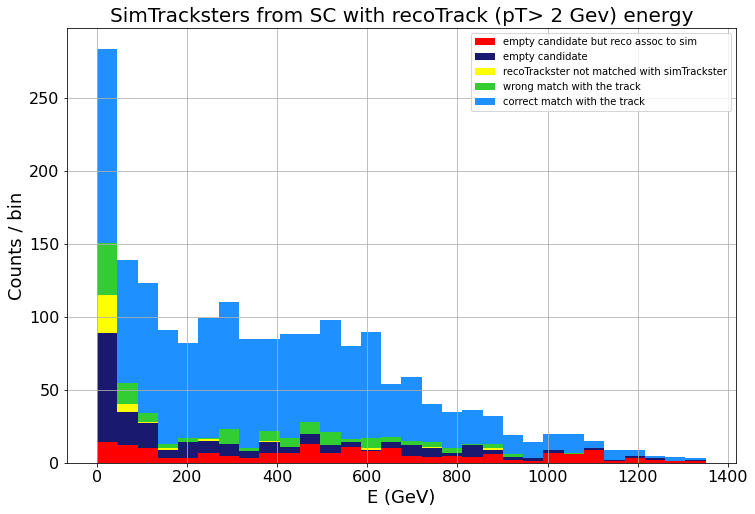

In [29]:
plt.figure(figsize=(12,8))
#plt.hist(all_energy, label="all", color="red", alpha=0.5, bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=False)
# plt.hist( label="not matched", color="orange", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)
# plt.hist(wrong_energy, label="wrong match", color="blue", histtype="step", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)

plt.hist([empty_but_reco_is_there, empty, reco_but_not_sim, wrong_energy, ok_energy],
         label=["empty candidate but reco assoc to sim", "empty candidate", "recoTrackster not matched with simTrackster", "wrong match with the track", "correct match with the track"], 
         color=["red","midnightblue", "yellow", "limegreen","dodgerblue"], 
         bins=30, 
         range=(min(all_energy), max(all_energy)), 
         stacked=True)

plt.grid()
plt.legend()
plt.title('SimTracksters from SC with recoTrack (pT> 2 Gev) energy')
plt.xlabel('E (GeV)', size=18)
plt.ylabel('Counts / bin', size=18)
plt.show()

In [ ]:
for ev in range(100):
    try:
        if ak.all(np.sort(track_in_candidate[track_in_candidate<4294967295][ev])!=np.sort(track_id[ev])) or ak.all(np.sort(SC_trackIdx[ev])!=np.sort(track_id[ev])):
            print(track_in_candidate[track_in_candidate<4294967295][ev])
            print(track_id[ev])
            print(SC_trackIdx[ev])
            print("-------")
    except:
        print(track_in_candidate[track_in_candidate<4294967295][ev])
        print(track_id[ev])
        print(SC_trackIdx[ev])
        print("-------")    

In [17]:
# loop on tracks associated to candidates
# check if candidate is empty
ok=0
not_ok=0
for ev in range(1000): 
#     print(track_in_candidate[ev])
#     print(tracksters_in_candidate[ev])
    for s, tkIdx in enumerate(track_in_candidate[ev]):
#         print(tkIdx)
        if tkIdx == 4294967295:
            continue # no reco track associated to simTrackster
            
        cand = tracksters_in_candidate[ev][s]

        if len(cand) == 0:
            not_ok += 1
#             print("not ok")
        else:
            ok += 1
#             print("ok")

print(ok / (ok + not_ok))

0.9835641071749686


In [318]:
# check that the only LC with one hit are in the scintillator
# OK if it does not print anything

ok = 0
for ev in range(1000): 
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        indices = SC_vi[ev][s]
        if len(indices)>0:
            mask = np.where(cluster_number_of_hits[ev][indices]==1)[0]
            positions = ([pos for pos in cluster_type[ev][indices][mask] if pos!=8])
            if len(positions)>0:
                print(positions)
#             print(cluster_number_of_hits[ev][indices][mask])
#             print(cluster_layer_id[ev][indices][mask])
#             print("---")

In [18]:
# efficiency using sim to reco
# loop on STs' tracks and match to reco tkMerge using the score (0.35)
# check if at least one of the associated tkMerge is associated to the same track

ok=0
den=0
for ev in range(1000): 
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1:
            continue # no reco track associated to simTrackster
        try:
#            print(track_id[ev], tkIdx)
            id_in_trkColl = np.where(track_id[ev] == tkIdx)[0][0]
        except:
            continue
        #print(tkIdx, track_pt[ev], track_id[ev])
        if track_pt[ev][id_in_trkColl] < 2: # GeV
            continue
        s2r_score = simToReco_score[ev][s]
        matched = False
        for i, score in enumerate(s2r_score):
            if score > 0.35:
                continue
            idx = simToReco_index[ev][s][i]
            track = track_in_candidate[ev][idx]
#             if len(tracksters_in_candidate[ev][idx])==0:
#                 continue
            if tkIdx==track:
                matched = True
                break
        den+=1
        if matched:
            ok += 1

In [19]:
eff = ok/den
print(eff)

0.3376826722338205


In [20]:
# efficiency using sim to reco
# loop on STs' tracks and match to reco tkMerge using the lowest score
# check if at least one of the associated tkMerge is associated to the same track

ok=0
den=0
for ev in range(1000): 
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1:
            continue # no reco track associated to simTrackster
        min_score = np.argmin(simToReco_score[ev][s])
        idx = simToReco_index[ev][s][min_score]
        if len(tracksters_in_candidate[ev][idx])==0:
            continue
        track = track_in_candidate[ev][idx]
        if tkIdx==track:
            ok += 1
        den+=1

In [21]:
eff = ok/den
print(eff)

0.3638132295719844


In [22]:
# efficiency using sim to reco 
# loop on STs' tracks and match to reco tkMerge using the energy (0.3 cut)
# check if at least one of the associated tkMerge is associated to the same track

ok=0
den=0
for ev in range(1000): 
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1 or SC_be[ev][s]==0:
            continue # no reco track associated to simTrackster
        try:
#            print(track_id[ev], tkIdx)
            id_in_trkColl = np.where(track_id[ev] == tkIdx)[0][0]
        except:
            continue
        #print(tkIdx, track_pt[ev], track_id[ev])
        if track_pt[ev][id_in_trkColl] < 2: # GeV
            continue
        s2r_en = simToReco_en[ev][s]
        matched = False
        for i, score in enumerate(s2r_en):
            score = score / SC_be[ev][s]
            if score < 0.2:
                continue
            idx = simToReco_index[ev][s][i]
            track = track_in_candidate[ev][idx]
            if len(tracksters_in_candidate[ev][idx])==0:
                continue
            if tkIdx==track:
                matched = True
                break
        den+=1
        if matched:
            ok += 1

In [23]:
eff = ok/den
print(eff)

0.3935281837160752


In [ ]:
# tracksters energy

all_energy=[]
wrong_energy=[]
not_matched_energy=[]
ok_energy=[]
recoTs_no_trk_energy = []
for ev in range(1000): 
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1:
            continue # no reco track associated to simTrackster
        try:
            id_in_trkColl = np.where(track_id[ev] == tkIdx)[0][0]
        except:
            continue
        if track_pt[ev][id_in_trkColl] < 2: # GeV
            continue
        print(f'Considering {tkIdx}')
        s2r_score = simToReco_score[ev][s]
        matched = False
        all_energy.append(SC_be[ev][s])
        if min(s2r_score)>0.35:
            not_matched_energy.append(SC_be[ev][s])
            break
        print(f'with scores {s2r_score}')
        tracks = []
        for i, score in enumerate(s2r_score):
            if score > 0.35:
                continue
            idx = simToReco_index[ev][s][i]
            track = track_in_candidate[ev][idx]
#             print(f'score: {score}, track: {track}')
            tracks.append(track)
            if tkIdx==track:
                matched = True
                break
        if not matched:
            if all(t == -1 for t in tracks):
#                 print("no match")
                recoTs_no_trk_energy.append(SC_be[ev][s])
            else:
                print("wrong match")
                wrong_energy.append(SC_be[ev][s])
        else:
#             print("correct match")
            ok_energy.append(SC_be[ev][s])
            

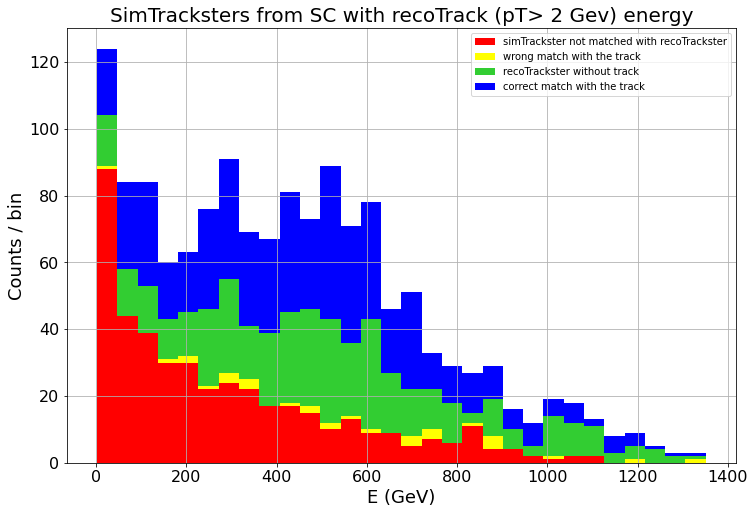

In [25]:
plt.figure(figsize=(12,8))
#plt.hist(all_energy, label="all", color="red", alpha=0.5, bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=False)
# plt.hist( label="not matched", color="orange", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)
# plt.hist(wrong_energy, label="wrong match", color="blue", histtype="step", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)

plt.hist([not_matched_energy, wrong_energy, recoTs_no_trk_energy, ok_energy],
         label=["simTrackster not matched with recoTrackster", "wrong match with the track", "recoTrackster without track", "correct match with the track"], 
         color=["red","yellow", "limegreen","blue"], 
         bins=30, 
         range=(min(all_energy), max(all_energy)), 
         stacked=True)

plt.grid()
plt.legend()
plt.title('SimTracksters from SC with recoTrack (pT> 2 Gev) energy')
plt.xlabel('E (GeV)', size=18)
plt.ylabel('Counts / bin', size=18)
plt.show()

In [ ]:
for ev in range(1000): 
    print("-----")
    print("number of tracks ", len(SC_trackIdx[ev]))
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1:
            continue # no reco track associated to simTrackster
        print(track_boundaryX[ev][s], track_boundaryY[ev][s], track_boundaryZ[ev][s])

## plots

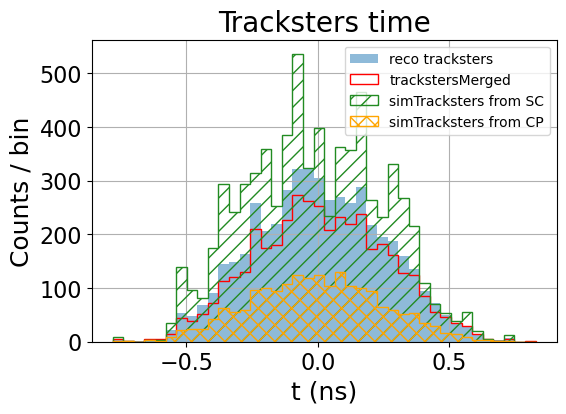

In [41]:
plt.figure(dpi=100)
rmin = min(ak.min(tracksters_CALO_time[tracksters_CALO_time>-99]), ak.min(trackstersMerged_CALO_time[trackstersMerged_CALO_time>-99]))
rmax = max(ak.max(tracksters_CALO_time[tracksters_CALO_time>-99]), ak.max(trackstersMerged_CALO_time[trackstersMerged_CALO_time>-99]))
plt.hist(ak.flatten(tracksters_CALO_time[tracksters_CALO_time>-99]), bins=40, alpha=.5, label="reco tracksters", range=(rmin,rmax))
plt.hist(ak.flatten(trackstersMerged_CALO_time[trackstersMerged_CALO_time>-99]), bins=40, color="red", histtype="step", label="trackstersMerged", range=(rmin,rmax))
plt.hist(ak.flatten(SC_CALO_time[SC_CALO_time>-99]), bins=40, color="forestgreen", histtype="step", label="simTracksters from SC", range=(rmin,rmax), hatch="//")
plt.hist(ak.flatten(CP_CALO_time[CP_CALO_time>-99]), bins=40, color="orange", histtype="step", label="simTracksters from CP", range=(rmin,rmax), hatch="XX")
plt.grid()
plt.legend()
plt.title('Tracksters time')
plt.xlabel('t (ns)', size=18)
plt.ylabel('Counts / bin', size=18)
plt.show()

In [223]:
massimo = max(ak.count(track_id, axis=1))
nphist(ak.count(track_id, axis=1), bins=massimo+1, title="number of tracks", xlabel="# tracks")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [102]:
# #TODO
# -keep/remove link tk-trk based on time compatibility
# -create new link tk-trk based on mtd